# Part 1: Basic Image Processing

Let's first read an image in and see how it looks!

In [1]:
%matplotlib inline
import p1
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
reload(p1)

<module 'p1' from 'C:\\Users\\agian\\OneDrive\\Documents\\GitHub\\cs4760-a1\\p1.py'>

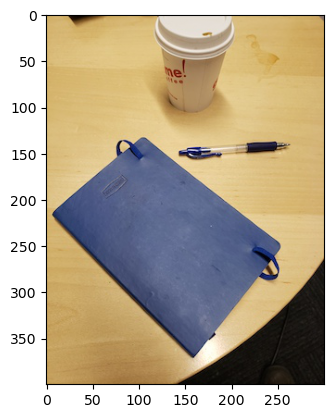

In [2]:
img = p1.imread('img.jpg')
plt.imshow(img)

## Filtering

Let's convolve with Gaussians of two different standard deviations and see what that gives us!

In [ ]:
filt1 = p1.gaussian_filter(11,3)
filt2 = p1.gaussian_filter(11,1)
gaussian_filtered1 = p1.convolve(img, filt1)
gaussian_filtered2 = p1.convolve(img, filt2)
plt.figure(); plt.imshow(gaussian_filtered1)
plt.figure(); plt.imshow(gaussian_filtered2)

## Image gradients

Let's now compute image gradients and visualize the gradient magnitude.

In [ ]:
gradmag, gradori = p1.gradient(img)
plt.figure(); plt.imshow(gradmag, cmap = plt.get_cmap('gray'), vmax = 1)

We can threshold the gradient image to get pixels on the boundary. We can even try to find all pixels with gradient orientation between 30 degrees and 90 degrees.

In [ ]:
plt.figure(); plt.imshow(gradmag>0.1, cmap=plt.get_cmap('gray'))
plt.figure(); plt.imshow((gradmag>0.1) & (gradori>np.pi/6) & (gradori<np.pi/2), cmap = plt.get_cmap('gray'))

# Part 2: Line detection

Now let's look for lines! We want to find the equation of every line in the image.
Any line is parametrized by $\theta$ and $c$, with the equation of the line given by:
$$x \cos \theta + y \sin \theta + c = 0$$
To detect lines, we will first define the set of possible values of $\theta$ and $c$.

In [ ]:
thetas = np.arange(-np.pi-np.pi/40, np.pi+np.pi/40, np.pi/40)
imgdiagonal = np.sqrt(img.shape[0]**2 + img.shape[1]**2)
cs = np.arange(-imgdiagonal, imgdiagonal, 0.5)

Next we will do Hough voting. Let's look at what the votes look like!

In [ ]:
votes = p1.hough_voting(gradmag, gradori, thetas, cs, 0.1, 0.5, np.pi/40)
plt.figure(); plt.imshow(votes, aspect='auto', cmap=plt.get_cmap('gray'), vmax=20)

Next let's find local maxima in this Hough transform, get the equations of the lines and draw the lines!

In [ ]:

lines = p1.localmax(votes, thetas, cs, 20, 11)
for (theta, c) in lines:
    print('{:.02f}x + {:.02f}y + {:.02f} = 0'.format(np.cos(theta), np.sin(theta), c))


newimg = p1.draw_lines(img, lines, 0.5)
plt.imshow(newimg)


Another example!

In [ ]:
img = p1.imread('img2.png')
plt.figure(); plt.imshow(img)
gradmag, gradori = p1.gradient(img)
votes = p1.hough_voting(gradmag, gradori, thetas, cs, 0.1, 0.5, np.pi/40)
lines = p1.localmax(votes, thetas, cs, 20, 11)
for (theta, c) in lines:
    print('{:.02f}x + {:.02f}y + {:.02f} = 0'.format(np.cos(theta), np.sin(theta), c))



newimg = p1.draw_lines(img, lines, 0.5)
plt.figure();plt.imshow(newimg)
